In [2]:
import os
print(os.getcwd())


C:\Users\lokes


In [3]:
import os
print("Reviews.csv" in os.listdir())


False


In [5]:
import os
print(os.listdir())


['.astropy', '.config', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.node_repl_history', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'cache', 'Contacts', 'Cookies', 'Creative Cloud Files', 'cue-app', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'http-video-stream', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'node_modules', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{403e6ad6-d190-11ef-bc46-965ab3b20689}.TM.blf', 'NTUSER.DAT{403e6ad6-d190-11ef-bc46-965ab3b20689}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{403e6ad6-d190-11ef-bc46-965ab3b20689}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'package-lock.json', 'package.json', 'postgresql_14.exe', 'Postman', 'PrintHood', 'project', 'project-name', 'Recent', 'Reviews.csv.zip', 'Saved Games', 'Searches', 'SendTo', 'src', 'Start Menu', 'task2', 'Templates', 'Untitled.ipynb', 'Videos', 'videostream']


In [7]:
import os
print("Reviews.csv.zip" in os.listdir())

True


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Reviews.csv.zip")

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                        

In [11]:
# Remove duplicate reviews
df.drop_duplicates(subset=['Text'], inplace=True)

# Remove missing values in the 'Text' column
df.dropna(subset=['Text'], inplace=True)

# Convert timestamp to a readable date
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Keep only necessary columns
df = df[['ProductId', 'Score', 'Time', 'Summary', 'Text']]

# Show dataset after cleaning
print(df.head())


    ProductId  Score       Time                Summary  \
0  B001E4KFG0      5 2011-04-27  Good Quality Dog Food   
1  B00813GRG4      1 2012-09-07      Not as Advertised   
2  B000LQOCH0      4 2008-08-18  "Delight" says it all   
3  B000UA0QIQ      2 2011-06-13         Cough Medicine   
4  B006K2ZZ7K      5 2012-10-21            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  


In [12]:
# Function to classify sentiment based on Score
def classify_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply the function to create a new Sentiment column
df["Sentiment"] = df["Score"].apply(classify_sentiment)

# Display count of each sentiment
print(df["Sentiment"].value_counts())

# Show updated dataset
print(df.head())


Sentiment
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64
    ProductId  Score       Time                Summary  \
0  B001E4KFG0      5 2011-04-27  Good Quality Dog Food   
1  B00813GRG4      1 2012-09-07      Not as Advertised   
2  B000LQOCH0      4 2008-08-18  "Delight" says it all   
3  B000UA0QIQ      2 2011-06-13         Cough Medicine   
4  B006K2ZZ7K      5 2012-10-21            Great taffy   

                                                Text Sentiment  
0  I have bought several of the Vitality canned d...  Positive  
1  Product arrived labeled as Jumbo Salted Peanut...  Negative  
2  This is a confection that has been around a fe...  Positive  
3  If you are looking for the secret ingredient i...  Negative  
4  Great taffy at a great price.  There was a wid...  Positive  


In [13]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

# Function to analyze sentiment using NLP
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Apply NLP-based sentiment analysis
df["NLP_Sentiment"] = df["Text"].apply(analyze_sentiment)

# Show updated dataset with both methods
print(df.head())


    ProductId  Score       Time                Summary  \
0  B001E4KFG0      5 2011-04-27  Good Quality Dog Food   
1  B00813GRG4      1 2012-09-07      Not as Advertised   
2  B000LQOCH0      4 2008-08-18  "Delight" says it all   
3  B000UA0QIQ      2 2011-06-13         Cough Medicine   
4  B006K2ZZ7K      5 2012-10-21            Great taffy   

                                                Text Sentiment NLP_Sentiment  
0  I have bought several of the Vitality canned d...  Positive      Positive  
1  Product arrived labeled as Jumbo Salted Peanut...  Negative      Negative  
2  This is a confection that has been around a fe...  Positive      Positive  
3  If you are looking for the secret ingredient i...  Negative      Positive  
4  Great taffy at a great price.  There was a wid...  Positive      Positive  


C:\Users\lokes\AppData\Local\Temp\ipykernel_11752\3048922006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="coolwarm")


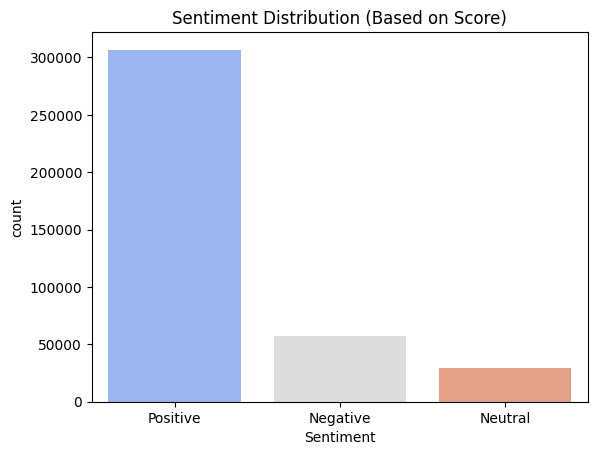

C:\Users\lokes\AppData\Local\Temp\ipykernel_11752\3048922006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NLP_Sentiment", palette="coolwarm")


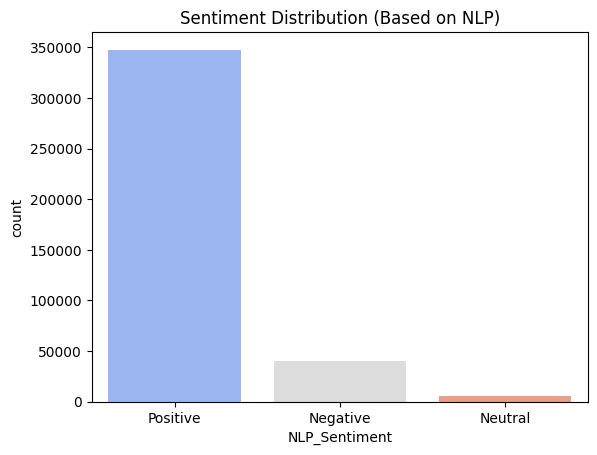

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare the two sentiment analysis methods
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution (Based on Score)")
plt.show()

sns.countplot(data=df, x="NLP_Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution (Based on NLP)")
plt.show()


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\lokes\AppData\Local\Temp\ipykernel_11752\2867414202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="coolwarm")


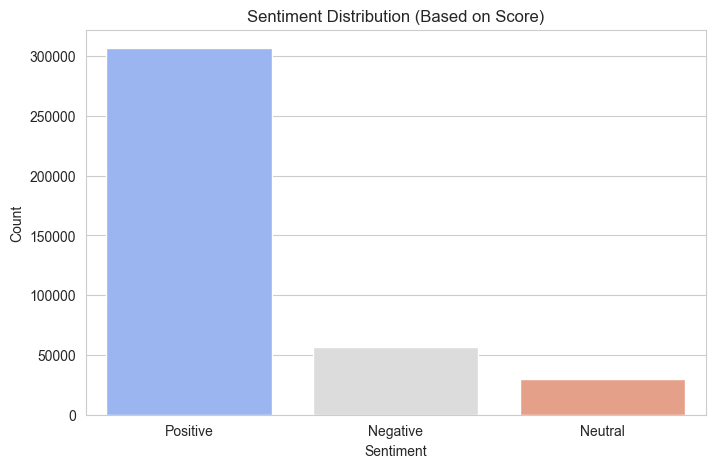

In [20]:
# Set the style of the plots
sns.set_style("whitegrid")

# Plot sentiment distribution (based on Score)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution (Based on Score)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [21]:
print(df["Sentiment"].value_counts())


Sentiment
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64


In [22]:
def classify_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Score"].apply(classify_sentiment)


In [23]:
print(df["Sentiment"].value_counts())


Sentiment
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64


In [24]:
# Function to classify sentiment based on Score
def classify_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply function to create Sentiment column
df["Sentiment"] = df["Score"].apply(classify_sentiment)

# Check if classification worked
print(df["Sentiment"].value_counts())


Sentiment
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64


In [25]:
print(df.head())  # Check if 'Sentiment' column is there


    ProductId  Score       Time                Summary  \
0  B001E4KFG0      5 2011-04-27  Good Quality Dog Food   
1  B00813GRG4      1 2012-09-07      Not as Advertised   
2  B000LQOCH0      4 2008-08-18  "Delight" says it all   
3  B000UA0QIQ      2 2011-06-13         Cough Medicine   
4  B006K2ZZ7K      5 2012-10-21            Great taffy   

                                                Text Sentiment NLP_Sentiment  
0  I have bought several of the Vitality canned d...  Positive      Positive  
1  Product arrived labeled as Jumbo Salted Peanut...  Negative      Negative  
2  This is a confection that has been around a fe...  Positive      Positive  
3  If you are looking for the secret ingredient i...  Negative      Positive  
4  Great taffy at a great price.  There was a wid...  Positive      Positive  


C:\Users\lokes\AppData\Local\Temp\ipykernel_11752\470094590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Sentiment", palette="coolwarm")


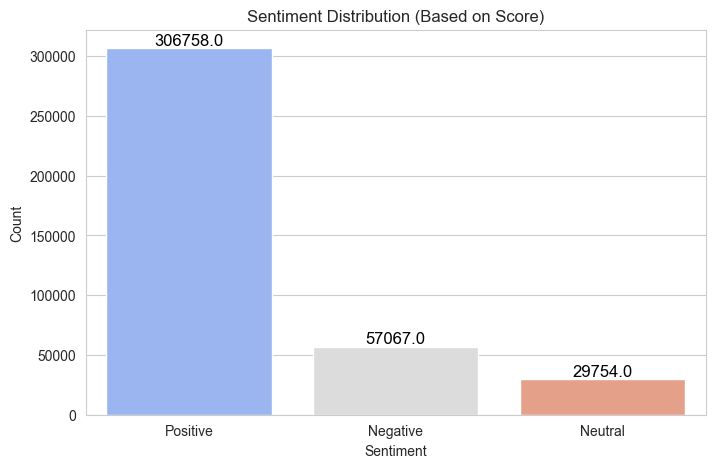

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Sentiment", palette="coolwarm")

# Show count values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Sentiment Distribution (Based on Score)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


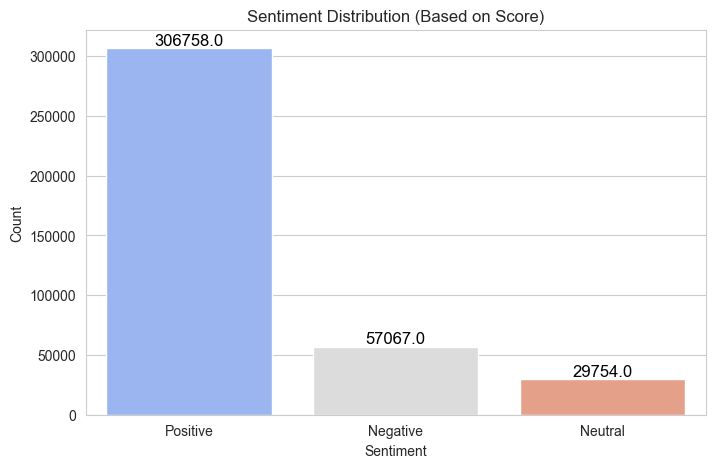

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Sentiment", hue="Sentiment", palette="coolwarm", legend=False)  # <-- Updated!

# Show count values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Sentiment Distribution (Based on Score)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


<Figure size 1200x600 with 0 Axes>

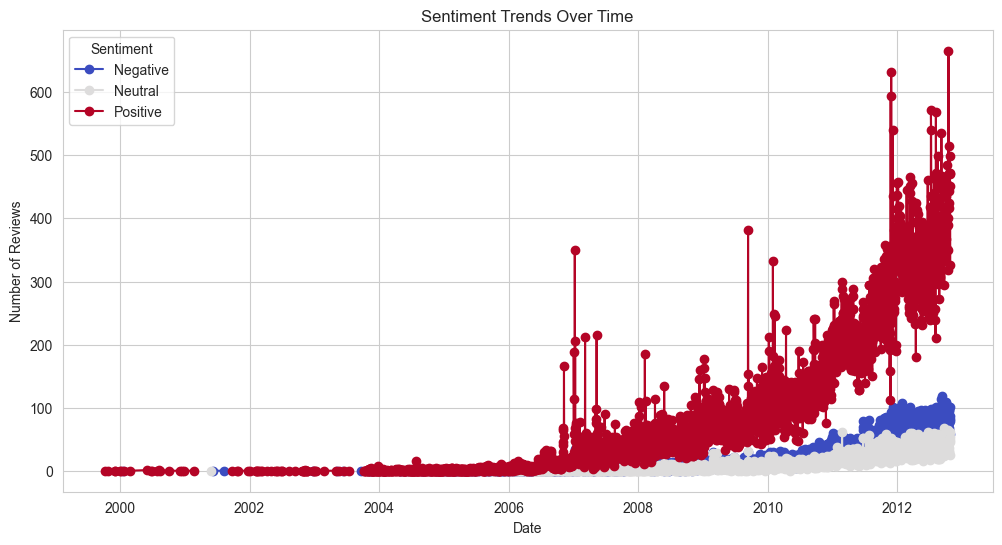

In [28]:
# Convert 'Time' column to datetime format (if not already)
df["Time"] = pd.to_datetime(df["Time"], unit="s")  # Amazon dataset uses UNIX timestamp

# Group by Date and Sentiment
df_time = df.groupby([df["Time"].dt.date, "Sentiment"]).size().unstack()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
df_time.plot(kind="line", marker="o", figsize=(12,6), colormap="coolwarm")

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()


C:\Users\lokes\AppData\Local\Temp\ipykernel_11752\3561513925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


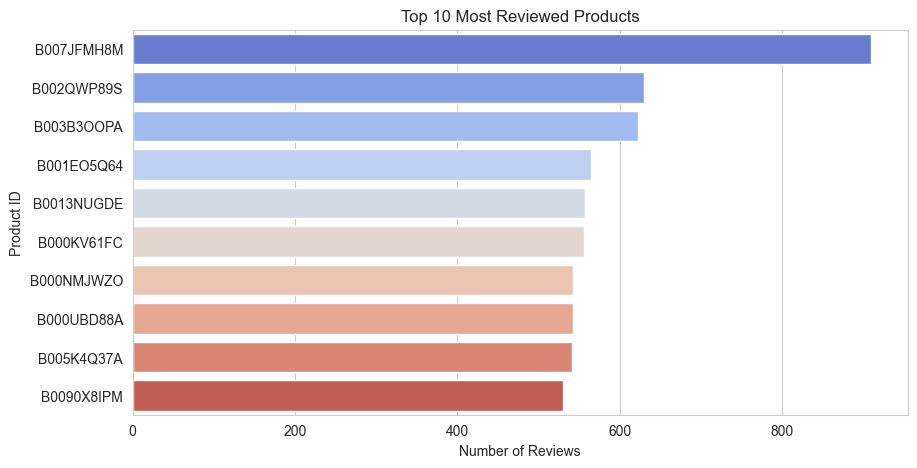

In [29]:
# Get top 10 most reviewed products
top_products = df["ProductId"].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ID")
plt.title("Top 10 Most Reviewed Products")
plt.show()


<Axes: ylabel='ProductId'>

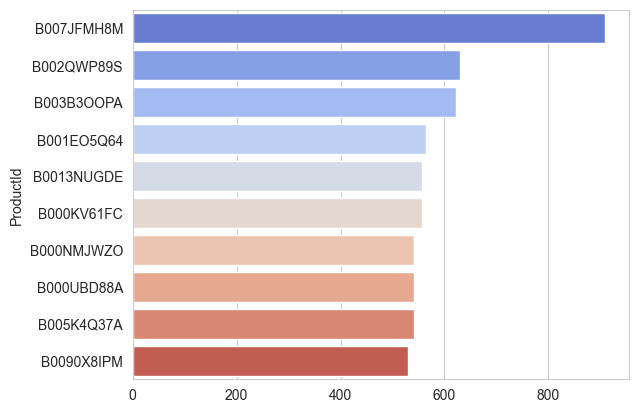

In [30]:
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="coolwarm", legend=False)


In [31]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


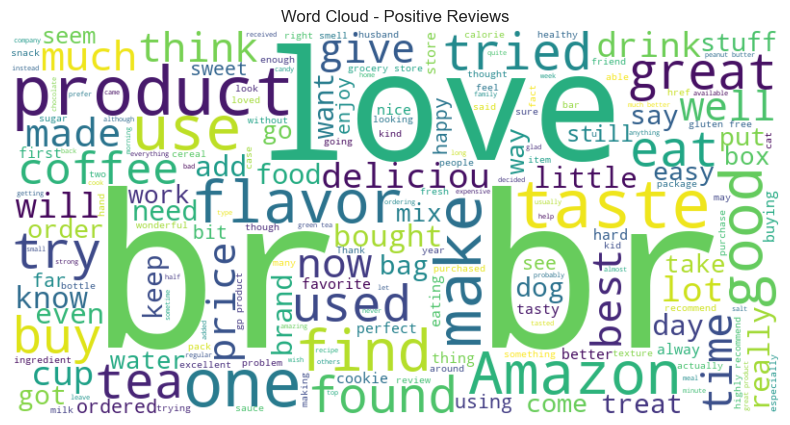

In [32]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()


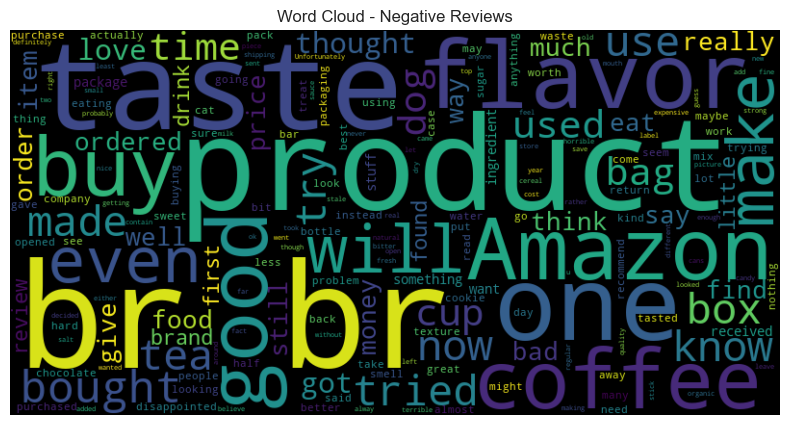

In [33]:
# Generate word cloud for negative reviews
negative_text = " ".join(df[df["Sentiment"] == "Negative"]["Text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()


In [34]:
df.to_csv("Cleaned_Amazon_Reviews.csv", index=False)


In [1]:
!jupyter nbconvert --to script Customer_Review_Sentiment_Analysis.ipynb


[NbConvertApp] Converting notebook Customer_Review_Sentiment_Analysis.ipynb to script
[NbConvertApp] Writing 6728 bytes to Customer_Review_Sentiment_Analysis.py
